In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

switch/PS5 年間販売台数データ

In [23]:
# switchとPS5の販売データ
sw_sales_df = pd.read_excel('data/consolidated_sales_2503.xlsx', sheet_name='Nintendo Switch以降')
ps5_sales_df = pd.read_excel('data/ps5_sales19-24.xlsx')

In [24]:
# sw_sales_df

In [25]:
# ps5_sales_df

In [26]:
# switch年間販売台数抽出(FY)　単位：百万台
sw_annual_sales = sw_sales_df.iloc[[2,10]].iloc[:, 4:]
sw_annual_sales.columns = sw_annual_sales.iloc[0].values
sw_annual_sales = sw_annual_sales[1:].reset_index(drop=True)
cols = sw_annual_sales.columns
cols = cols.str.replace('FY3/', '', regex=False)
cols = cols.str.replace('累計', 'Total', regex=False)
sw_annual_sales.columns = cols
sw_annual_sales.index = ['switch']
sw_annual_sales

,2017,2018,2019,2020,2021,2022,2023,2024,2025,Total
switch,274,1505,1695,2103,2883,2306,1797,1570,1080,15212


In [27]:
# PS5間販売台数抽出 (FY)　単位：百万台
ps5_annual_sales = ps5_sales_df[['年度','FY']]
ps5_annual_sales = ps5_annual_sales.set_index('年度').T
ps5_annual_sales.columns.name = None
ps5_annual_sales.index = ['PS5']
ps5_annual_sales.drop(columns='FY19', inplace=True)
cols = ['2020', '2021', '2022', '2023', '2024']
ps5_annual_sales.columns = cols
ps5_annual_sales.iloc[0] = (ps5_annual_sales.iloc[0]*100).astype(int)
ps5_annual_sales

,2020,2021,2022,2023,2024
PS5,780,1150,1910,2090,1850


,2017,2018,2019,2020,2021,2022,2023,2024,Total
switch,274,1505,1695,2103,2883,2306,1797,1570,15212
PS5,NaN,NaN,NaN,780,1150,1910,2090,1850,7780


<Axes: >

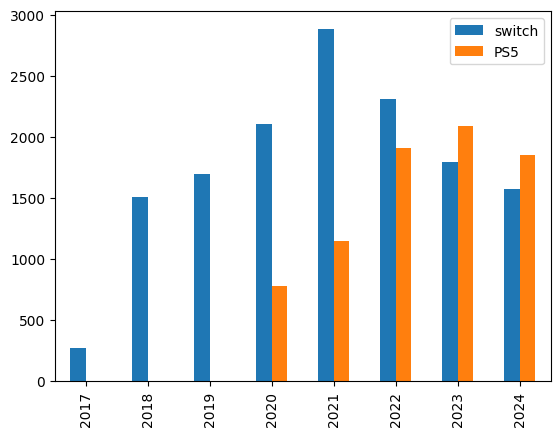

In [33]:
# swich/PS5年間販売台数データ結合　プロット
annual_sales = pd.concat([sw_annual_sales, ps5_annual_sales])
annual_sales.drop(columns='2025', inplace=True)
annual_sales.loc['PS5','Total'] = annual_sales.loc['PS5'].sum()
display(annual_sales)

annual_sales_plot = annual_sales.drop(columns='Total')
annual_sales_plot.T.plot(kind='bar')

In [ ]:
# PS5四半期販売台数推移
ps5_quarter_sales_df = ps5_sales_df.drop(columns='FY')
# display(ps5_quarter_sales_df)
cols = list(ps5_quarter_sales_df.columns)
rows = list(ps5_quarter_sales_df['年度'])
rows, cols
# ps5_quarter_sales_df

(['FY19', 'FY20', 'FY21', 'FY22', 'FY23', 'FY24'],
 ['年度', 'Q1', 'Q2', 'Q3', 'Q4'])

In [ ]:
ps5_quarter_sales_df = ps5_quarter_sales_df.melt(id_vars='年度', var_name='quarter', value_name='sales')
ps5_quarter_sales_df['label'] = ps5_quarter_sales_df['年度'] + '/' + ps5_quarter_sales_df['quarter']
ps5_quarter_sales_df['sort_key'] = ps5_quarter_sales_df['年度'].str.extract(r'FY(\d+)').astype(int) + \
                        ps5_quarter_sales_df['quarter'].str.extract(r'Q(\d)').astype(int) / 10
ps5_quarter_sales_df = ps5_quarter_sales_df.sort_values('sort_key')[['label', 'sales']].reset_index(drop=True)
# display(ps5_quarter_sales_df)
ps5_quarter_sales_df = ps5_quarter_sales_df[ps5_quarter_sales_df['label']>='FY20/Q3']
ps5_quarter_sales_df.set_index('label', inplace=True)
ps5_quarter_sales_df.index.name = None
ps5_quarter_sales_df['sales'] = ps5_quarter_sales_df['sales'] * 100
# ps5_quarter_sales_df.plot(x='label', y='sales', kind='line', marker='o')

# インデクスを年/月に置換
q_to_month = {'Q1': '06', 'Q2': '09', 'Q3': '12', 'Q4': '03'}
def q_to_month(q):
    fy, a = q.split('/')

ps5_quarter_sales_df.head()

,sales
FY20/Q3,450.0
FY20/Q4,330.0
FY21/Q1,230.0
FY21/Q2,330.0
FY21/Q3,390.0


<Axes: >

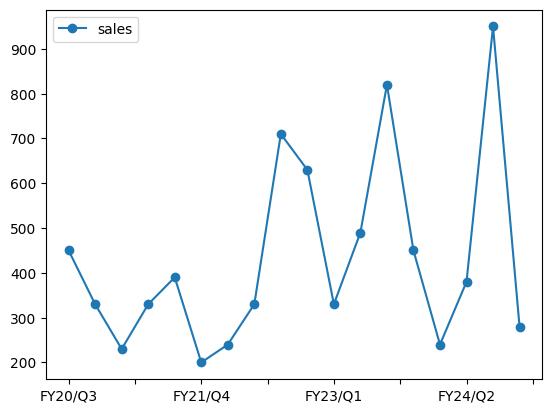

In [ ]:
ps5_quarter_sales_df.plot(marker='o')

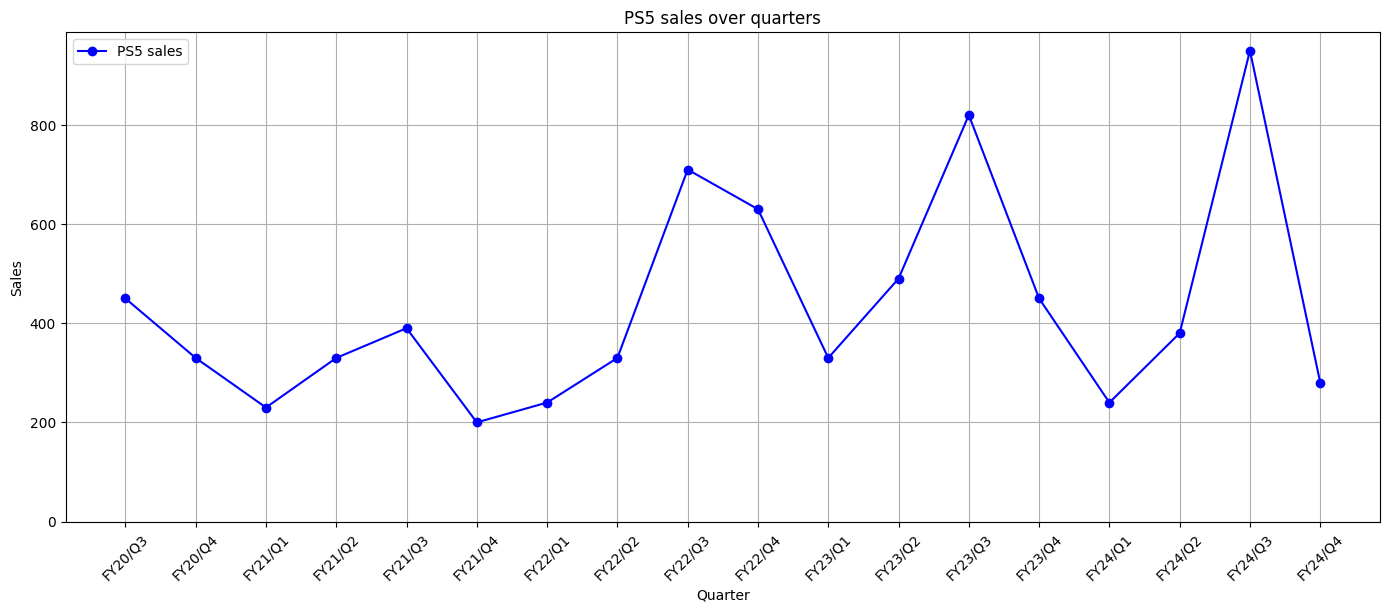

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(ps5_quarter_sales_df.index, ps5_quarter_sales_df.values, marker='o', color='blue', label='PS5 sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.title('PS5 sales over quarters')
plt.show()